In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/TwistedFatee/global_video_game_sales_prediction/master/data/vg.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [3]:
# we can see that there are great missing values
data = data.rename(columns={"Year_of_Release": "Year", "NA_Sales": "NA", "EU_Sales": "EU", "JP_Sales": "JP", "Other_Sales": "Other", "Global_Sales": "Global"})
data = data[data["Year"].notnull()]
data = data[data["Genre"].notnull()]
data["Year"] = data["Year"].apply(int)
data["Age"] = 2019 - data["Year"]
data.describe(include="all")

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
count,16448,16448,16448.000000,16448,16416,16448.000000,16448.000000,16448.000000,16448.000000,16448.00000,7983.000000,7983.000000,9840,7463.000000,9907,9769,16448.000000
unique,11429,31,NaN,12,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1680,8,NaN
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E,NaN
freq,12,2127,NaN,3308,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2377,NaN,201,3922,NaN
mean,NaN,NaN,2006.488996,NaN,NaN,0.263965,0.145895,0.078472,0.047583,0.53617,68.994363,26.441313,NaN,163.015141,NaN,NaN,12.511004
std,NaN,NaN,5.877470,NaN,NaN,0.818286,0.506660,0.311064,0.187984,1.55846,13.920060,19.008136,NaN,563.863327,NaN,NaN,5.877470
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.01000,13.000000,3.000000,NaN,4.000000,NaN,NaN,-1.000000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.06000,60.000000,12.000000,NaN,10.000000,NaN,NaN,9.000000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.17000,71.000000,22.000000,NaN,24.000000,NaN,NaN,12.000000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.47000,79.000000,36.000000,NaN,81.000000,NaN,NaN,16.000000


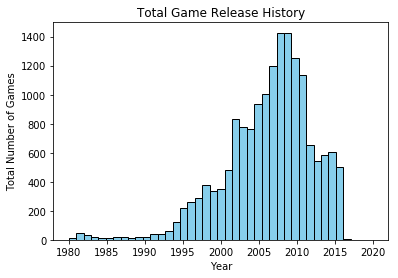

In [4]:
# we can see there is a large number of outliers in EU, NA Global etc.
import matplotlib.pyplot as plt
%matplotlib inline

numOfYears = data["Year"].max() - data["Year"].min() + 1
plt.hist(data["Year"], bins=numOfYears, color="skyblue", edgecolor="black")
plt.title("Total Game Release History")
plt.xlabel("Year")
plt.ylabel("Total Number of Games");

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


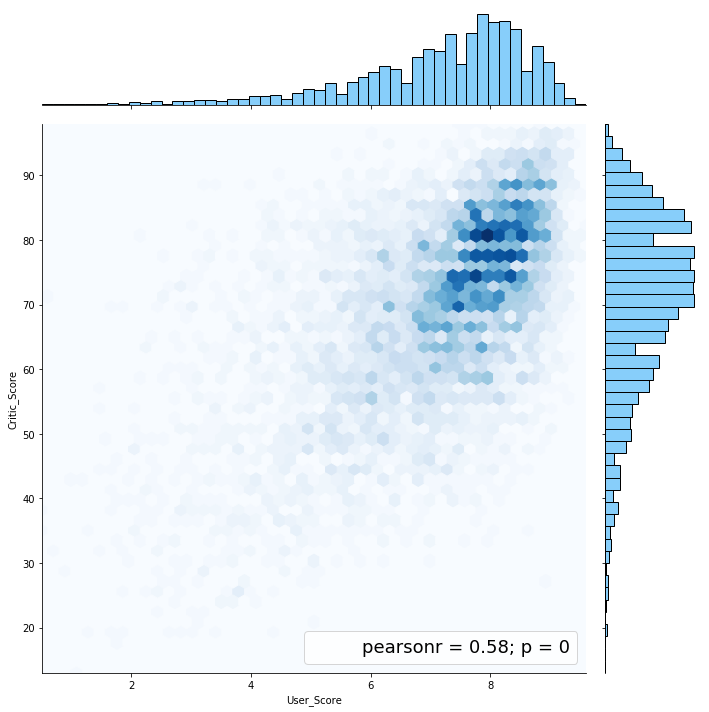

In [5]:
import seaborn as sns
data["User_Score"] = data["User_Score"].replace("tbd", np.nan).astype(float)

g = sns.jointplot(x="User_Score", y="Critic_Score", data=data, cmap="Blues", kind="hex", size=10, marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}}, annot_kws={"loc": 4, "fontsize": 18});
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False);

In [6]:
# we can see that the user score is correlated to critic score, the Pearson's correlation coefficient is 0.58, which is medium related
na_data = data.isnull().sum().sort_values(ascending=False).head(10)
na_rate = na_data / len(data) * 100
na_data = pd.concat([na_data,na_rate],axis=1,keys=['Missing Values','percentage of missing rate'])
na_data.head(7)

,Missing Values,percentage of missing rate
User_Count,8985,54.626702
User_Score,8985,54.626702
Critic_Count,8465,51.465224
Critic_Score,8465,51.465224
Rating,6679,40.606761
Developer,6541,39.767753
Publisher,32,0.194553


In [7]:
# trying to remove outliers
def removeOutliers(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
        # Calculate first and third quartile
        first_quartile = df_out[key].describe()["25%"]
        third_quartile = df_out[key].describe()["75%"]

        # calculate the interquartile range
        iqr = third_quartile - first_quartile

        # remove outliers
        removed = df_out[(df_out[key] <= (first_quartile - 3 * iqr)) | (df_out[key] >= (third_quartile + 3 * iqr))] 
        df_out = df_out[(df_out[key] > (first_quartile - 3 * iqr)) & (df_out[key] < (third_quartile + 3 * iqr))]
        
    return df_out, removed

In [8]:
data, removeGlobal = removeOutliers(data, ["Global"])
data.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,15401.000000,15401.000000,15401.000000,15401.000000,15401.000000,15401.000000,7286.000000,7286.000000,6747.000000,6747.000000,15401.000000
mean,2006.592624,0.144688,0.072628,0.047301,0.024357,0.289258,67.779028,24.518117,7.079976,111.325033,12.407376
std,5.758078,0.210709,0.131408,0.130786,0.050152,0.346918,13.612120,17.194878,1.511031,406.635191,5.758078
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,-1.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,59.000000,11.000000,6.300000,9.000000,9.000000
50%,2007.000000,0.070000,0.020000,0.000000,0.010000,0.150000,70.000000,20.000000,7.400000,21.000000,12.000000
75%,2010.000000,0.190000,0.080000,0.030000,0.030000,0.380000,78.000000,34.000000,8.200000,61.000000,16.000000
max,2020.000000,1.670000,1.580000,1.650000,1.180000,1.690000,98.000000,106.000000,9.700000,10665.000000,39.000000


In [9]:
# drop samples that don't have user_score, critic_score or rating
scored = data.dropna(subset=["User_Score", "Critic_Score", "Rating"])
scored, removeUserCount = removeOutliers(scored, ["User_Count"])
scored.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000
mean,2007.055837,0.205403,0.098572,0.028995,0.036368,0.369597,67.815866,24.958439,7.124575,37.459523,11.944163
std,4.010373,0.225580,0.138941,0.095492,0.056428,0.367824,13.408831,15.689528,1.440391,44.572477,4.010373
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,3.000000
25%,2004.000000,0.060000,0.010000,0.000000,0.010000,0.100000,60.000000,13.000000,6.400000,9.000000,9.000000
50%,2007.000000,0.130000,0.040000,0.000000,0.020000,0.230000,70.000000,22.000000,7.400000,20.000000,12.000000
75%,2010.000000,0.280000,0.130000,0.000000,0.047500,0.520000,78.000000,34.000000,8.200000,45.000000,15.000000
max,2016.000000,1.670000,1.160000,1.390000,1.130000,1.690000,98.000000,91.000000,9.600000,233.000000,34.000000


In [10]:
# check unique terms
scored["Platform"].unique(), scored["Genre"].unique(), scored["Rating"].unique()

(array(['PS2', 'GBA', 'X360', 'PS3', 'PC', 'Wii', 'PSP', 'PS', 'XB', 'GC',
        'DS', 'XOne', '3DS', 'DC', 'PS4', 'WiiU', 'PSV'], dtype=object),
 array(['Shooter', 'Action', 'Role-Playing', 'Racing', 'Simulation',
        'Sports', 'Fighting', 'Platform', 'Misc', 'Strategy', 'Puzzle',
        'Adventure'], dtype=object),
 array(['M', 'E', 'T', 'E10+', 'RP'], dtype=object))

In [11]:
# one-hot encoding of categorical features
import category_encoders as ce

numeric_subset = scored.select_dtypes("number").drop(columns=["NA", "EU", "JP", "Other", "Year"])
categorical_subset = scored[["Platform", "Genre", "Rating"]]

# one-hot encoding
encoder = ce.one_hot.OneHotEncoder()
categorical_subset = encoder.fit_transform(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis = 1)

correlations = features.corr()["Global"].dropna().sort_values()


In [12]:
# the highest and lowest correlations of global sales
correlations.head(5)

Platform_5    -0.186725
Genre_10      -0.094686
Genre_12      -0.084227
Platform_17   -0.069683
Platform_15   -0.062370
Name: Global, dtype: float64

In [13]:
correlations.tail(5)

User_Score      0.155470
User_Count      0.252651
Critic_Score    0.281545
Critic_Count    0.292327
Global          1.000000
Name: Global, dtype: float64

In [14]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split
basic_target = pd.Series(features["Global"])
basic_features = features.drop(columns="Global")
x_train, x_test, y_train, y_test = train_test_split(basic_features, basic_target, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4427, 42)
(1107, 42)
(4427,)
(1107,)


In [15]:
# use mean absolute error to evalueate the model
def mae(y_true, y_pred):
    return np.average(abs(y_true - y_pred))

In [16]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost

In [17]:
# training method
def fit_and_evaluate(model):

    model.fit(x_train, y_train)

    model_pred = model.predict(x_test)
    model_mae = mae(y_test, model_pred)
    
    return model_mae

In [18]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print("Linear Regression: Mean Absolute Error = {:.04f}".format(lr_mae))

Linear Regression: Mean Absolute Error = 0.2361


In [19]:
svm = SVR(C = 1000, gamma=0.1)
svm_mae = fit_and_evaluate(svm)

print("Support Vector Machine: Mean Absolute Error = {:.04f}".format(svm_mae))

Support Vector Machine: Mean Absolute Error = 0.2859


In [20]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print("Random Forest Regression: Mean Absolute Error = {:.04f}".format(random_forest_mae))

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression: Mean Absolute Error = 0.2317


In [21]:
gradient_boosting = GradientBoostingRegressor(random_state=60)
gradient_boosting_mae = fit_and_evaluate(gradient_boosting)

print("Gradient Boosting Regression: Mean Absolute Error = {:.04f}".format(gradient_boosting_mae))

Gradient Boosting Regression: Mean Absolute Error = 0.2197


In [22]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print("K-Nearest Neighbors Regression: Mean Absolute Error = {:.04f}".format(knn_mae))

K-Nearest Neighbors Regression: Mean Absolute Error = 0.2556


In [23]:
ridge = Ridge(alpha=10)
ridge_mae = fit_and_evaluate(ridge)

print("Ridge Regression: Mean Absolute Error = {:.04f}".format(ridge_mae))

Ridge Regression: Mean Absolute Error = 0.2354


In [24]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_mae = mae(y_test, xgb_pred)

print("xgboost: Mean Absolute Error = {:.04f}".format(xgb_mae))

xgboost: Mean Absolute Error = 0.2132


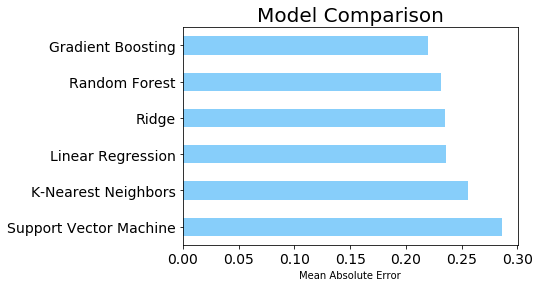

In [25]:
# compare the performance of each model
model_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine", "Random Forest", "Gradient Boosting", "K-Nearest Neighbors", "Ridge"],
                                 "mae": [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosting_mae, knn_mae, ridge_mae]})
model_comparison.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                                           color="lightskyblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison", size=20);

In [27]:
# we can see that Gradient Boosting is the best model
loss = ["ls", "lad", "huber"]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8]
min_samples_split = [2, 4, 6, 10]
max_features = ["auto", "sqrt", "log2", None]
hyperparameter_grid = {"loss": loss,
                       "max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features}

In [29]:
# hyperparameters optimize
from sklearn.model_selection import RandomizedSearchCV

basic_model = GradientBoostingRegressor(random_state = 42)
random_cv = RandomizedSearchCV(estimator=basic_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=42)

random_cv.fit(x_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   28.9s finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [30]:
# print the 10 top estimators
random_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score", ascending=False)
random_results.head(10)[["mean_test_score", "param_loss",
                         "param_max_depth", "param_min_samples_leaf", "param_min_samples_split",
                         "param_max_features"]]

,mean_test_score,param_loss,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_max_features
0,-0.200249,huber,15,8,6,log2
17,-0.200575,lad,15,2,4,log2
7,-0.202390,huber,5,6,6,auto
16,-0.208902,lad,3,1,10,log2
15,-0.208946,ls,5,4,6,auto
8,-0.210783,lad,2,4,10,auto
19,-0.214095,lad,2,1,10,sqrt
3,-0.214285,lad,2,8,10,sqrt
1,-0.214556,huber,2,2,4,None
2,-0.217556,ls,3,1,4,sqrt


In [31]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=15,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=8, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [34]:
from sklearn.model_selection import GridSearchCV

trees_grid = {"n_estimators": [50, 100, 150, 200, 250, 300]}

basic_model = random_cv.best_estimator_
grid_search = GridSearchCV(estimator=basic_model, param_grid=trees_grid, cv=4, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)

grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   14.7s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=15,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=8, min...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

Text(0.5,1,'Relationship between MAE and number of Trees')

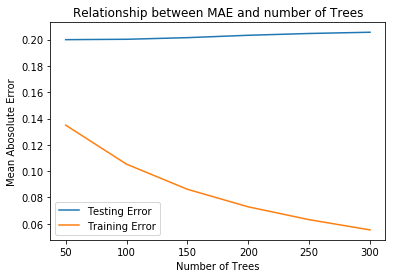

In [36]:
# print out the results
results = pd.DataFrame(grid_search.cv_results_)

plt.plot(results["param_n_estimators"], -1 * results["mean_test_score"], label = "Testing Error")
plt.plot(results["param_n_estimators"], -1 * results["mean_train_score"], label = "Training Error")
plt.xlabel("Number of Trees"); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Relationship between MAE and number of Trees")

In [37]:
finalModel = grid_search.best_estimator_

In [38]:
finalModel

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=15,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=8, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=50,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [39]:
finalPredictions = finalModel.predict(x_test)

In [40]:
final_mae = mae(y_test, finalPredictions)

In [42]:
print("Final model: Mean Absolute = {:.04f}.".format(final_mae))

Final model: Mean Absolute = 0.2095.


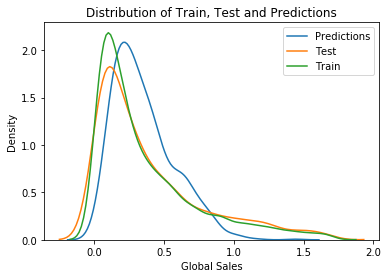

In [44]:
# draw result plot
sns.kdeplot(finalPredictions, label = "Predictions")
sns.kdeplot(y_test, label = "Test")
sns.kdeplot(y_train, label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Distribution of Train, Test and Predictions");

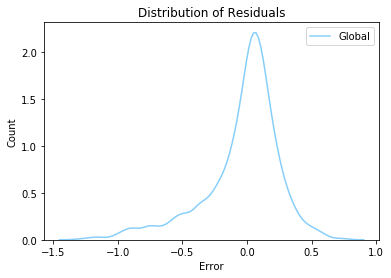

In [48]:
residuals = finalPredictions - y_test

sns.kdeplot(residuals, color = "lightskyblue")
plt.xlabel("Error"); plt.ylabel("Count")
plt.title("Distribution of Residuals");